In [1]:
import pandas as pd
import numpy as np
import glob
import array
import random
import math


from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats as stats
from scipy import signal
from scipy import stats

import scipy.io


import dtaidistance
from dtaidistance import preprocessing
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis


from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft





/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
def present_first_and_last_with_reticence(data):
  
    first_rows = data.head(3)
    
   
    last_rows = data.tail(3)
    
    
    ret = pd.DataFrame({col: ['...'] for col in data.columns}, index=['...'])
    
  
    apre = pd.concat([first_rows, ret, last_rows])
    
    return apre


In [3]:
data=pd.read_excel("Prices_Excel/processed_data/CL/company_products/CL_No_Client_companies_product.xlsx") 
data.head()

,My price,Wom / Loyalty,Falabella / Loyalty,Lider / Loyalty,Paris / Loyalty,Abcdin / Loyalty,Claro / Loyalty,Aufbau / Loyalty,Mac Online / Loyalty,Ripley / Loyalty,Movistar / Loyalty
0,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,NaN,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB
1,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,NaN,NaN,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB
2,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB
3,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),NaN,NaN,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G)
4,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),NaN,NaN,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G)


In [4]:
companies=data.columns
companies=companies.tolist()
companies


['My price',
 'Wom / Loyalty',
 'Falabella / Loyalty',
 'Lider / Loyalty',
 'Paris / Loyalty',
 'Abcdin / Loyalty',
 'Claro / Loyalty',
 'Aufbau / Loyalty',
 'Mac Online / Loyalty',
 'Ripley / Loyalty',
 'Movistar / Loyalty']

In [5]:
column_products_A = set(data['Wom / Loyalty'])
column_products_B = set(data['Falabella / Loyalty'])


common_products = column_products_A.intersection(column_products_B)
common_products

{'Apple iPhone 11 128GB',
 'Apple iPhone 11 64GB',
 'Apple iPhone 13 128GB',
 'Apple iPhone 14 128GB ',
 'Apple iPhone 14 256GB ',
 'Apple iPhone 14 512GB',
 'Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Pro 128GB',
 'Apple iPhone 14 Pro 256GB',
 'Apple iPhone 14 Pro Max 128GB ',
 'Apple iPhone 14 Pro Max 256GB ',
 'Motorola Moto E22i  64GB',
 'Samsung Galaxy A23 128GB (5G)',
 'Samsung Galaxy S22 128GB (5G)',
 'Samsung Galaxy S22 256GB (5G)',
 'Samsung Galaxy S23 256GB',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Vivo Y22s 128GB '}

# Function

In [6]:
def list_of_product_common(company1, company2):
    column_products_A = set(data[company1])
    column_products_B = set(data[company2])

    common_products = column_products_A.intersection(column_products_B)
    return common_products

### 'Wom / Loyalty' vs 'Falabella / Loyalty'

In [7]:
company1='Wom / Loyalty' 
company2='Falabella / Loyalty'
common_products=list(list_of_product_common(company1, company2))
common_products

['Apple iPhone 14 Pro 128GB',
 'Apple iPhone 14 Pro 256GB',
 'Motorola Moto E22i  64GB',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 256GB ',
 'Apple iPhone 14 128GB ',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Samsung Galaxy S22 128GB (5G)',
 'Apple iPhone 14 512GB',
 'Apple iPhone 11 128GB',
 'Apple iPhone 13 128GB',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Apple iPhone 11 64GB',
 'Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Pro Max 256GB ',
 'Samsung Galaxy S22 256GB (5G)',
 'Vivo Y22s 128GB ',
 'Apple iPhone 14 Pro Max 128GB ',
 'Samsung Galaxy S23 256GB',
 'Samsung Galaxy A23 128GB (5G)']

In [8]:
path = "Prices_Excel/processed_data/CL/time_series_processed/"  
list_product = glob.glob(path+ "*.xlsx")
list_product

['Prices_Excel/processed_data/CL/time_series_processed/Vivo Y16 64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Motorola Moto E22i  64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 256GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Samsung Galaxy S22 128GB (5G).xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 11 64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro Max 256GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Plus 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro Max 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro 256GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro 128GB.xlsx',
 'Prices_Excel/processed_data/CL/time_se

In [10]:
df_company1=pd.DataFrame(columns=common_products)
df_company2=pd.DataFrame(columns=common_products)
df_company1

,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 256GB,Apple iPhone 14 128GB,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 256GB (5G),Vivo Y22s 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S23 256GB,Samsung Galaxy A23 128GB (5G)


In [11]:
max_len = None  

for i in common_products:
    data = pd.read_excel(path + i + ".xlsx") 
    df_company1[i] = data[company1]
    df_company2[i] = data[company2]
    
    
    current_len = len(data['Date'].tolist()) 
    
    if max_len is None or current_len > max_len:
        max_len = current_len  
        date=data['Date'].tolist()


In [12]:
df_company1.index = date
df_company2.index = date



In [13]:
df_company1

,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 256GB,Apple iPhone 14 128GB,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 256GB (5G),Vivo Y22s 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S23 256GB,Samsung Galaxy A23 128GB (5G)
20/12/2023,"$1,002,000",-,"$76,800",-,"$897,600","$865,200",-,-,-,-,"$720,000",-,"$430,800","$1,044,000",-,"$552,000","$150,000","$1,156,800","$840,000","$216,000"
19/12/2023,"$1,002,000",-,"$76,800",-,"$897,600","$865,200",-,-,-,-,"$720,000",-,"$430,800","$1,044,000",-,"$552,000","$150,000","$1,156,800","$840,000","$216,000"
18/12/2023,"$1,002,000",-,"$76,800",-,"$897,600","$865,200",-,-,-,-,"$744,000",-,"$430,800","$1,044,000",-,"$552,000","$150,000","$1,156,800","$840,000","$216,000"
17/12/2023,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
16/12/2023,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/01/2023,"$1,198,800",-,-,"$1,192,800","$1,056,000","$948,000","$924,000","$640,800","$1,324,800",-,"$804,000",-,"$438,000","$1,072,800",-,"$696,000","$220,800",-,NaN,"$256,800"
04/01/2023,"$1,198,800",-,-,"$1,192,800","$1,056,000","$948,000","$924,000","$640,800","$1,324,800",-,"$804,000",-,"$438,000","$1,072,800",-,"$696,000","$220,800",-,NaN,"$256,800"
03/01/2023,"$1,198,800",-,-,"$1,192,800","$1,056,000","$948,000","$924,000","$640,800","$1,324,800",-,"$804,000",-,"$438,000","$1,072,800",-,"$696,000","$220,800",-,NaN,"$256,800"
02/01/2023,"$1,198,800",-,-,"$1,192,800","$1,056,000","$948,000","$924,000","$640,800","$1,324,800",-,"$804,000",-,"$438,000","$1,072,800",-,"$696,000","$220,800",-,NaN,"$256,800"


In [14]:
df_company1.index = pd.to_datetime(df_company1.index, format='%d/%m/%Y')
df_company2.index = pd.to_datetime(df_company2.index, format='%d/%m/%Y')

df_company1= df_company1.sort_index(ascending=True)
df_company2 = df_company2.sort_index(ascending=True)

In [15]:
import pandas as pd
from IPython.display import display
import dataframe_image as dfi
dfi.export(df_company1.iloc[:, [0, 4,7,16,17,18,19]].head(10), 'img_tese_cp3/df_company1.png')


206334 bytes written to file /var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/tmprgj0rz_a/temp.png
203280 bytes written to file /var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/tmphlbwycfo/temp.png


In [16]:
df_company1.iloc[:, [0, 4,7,16,17,18,19]]

,Apple iPhone 14 Pro 128GB,Apple iPhone 14 256GB,Samsung Galaxy S22 128GB (5G),Vivo Y22s 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S23 256GB,Samsung Galaxy A23 128GB (5G)
2023-01-01,"$1,198,800","$1,056,000","$640,800","$220,800",-,NaN,"$256,800"
2023-01-02,"$1,198,800","$1,056,000","$640,800","$220,800",-,NaN,"$256,800"
2023-01-03,"$1,198,800","$1,056,000","$640,800","$220,800",-,NaN,"$256,800"
2023-01-04,"$1,198,800","$1,056,000","$640,800","$220,800",-,NaN,"$256,800"
2023-01-05,"$1,198,800","$1,056,000","$640,800","$220,800",-,NaN,"$256,800"
...,...,...,...,...,...,...,...
2023-12-16,-,-,-,-,-,-,-
2023-12-17,-,-,-,-,-,-,-
2023-12-18,"$1,002,000","$897,600",-,"$150,000","$1,156,800","$840,000","$216,000"
2023-12-19,"$1,002,000","$897,600",-,"$150,000","$1,156,800","$840,000","$216,000"


In [17]:
dfi.export(df_company2.iloc[:, [0, 4,7,16,17,18,19]].head(10), 'img_tese_cp3/df_company2.png')

176550 bytes written to file /var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/tmph60358jq/temp.png
175550 bytes written to file /var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/tmpxazy8vwd/temp.png


In [18]:
df_company2

,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 256GB,Motorola Moto E22i 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 256GB,Apple iPhone 14 128GB,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy S22 128GB (5G),Apple iPhone 14 512GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Samsung Galaxy Z Fold4 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 256GB (5G),Vivo Y22s 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S23 256GB,Samsung Galaxy A23 128GB (5G)
2023-01-01,"$1,199,990","$1,349,990",-,"$1,249,990","$1,099,990","$949,990","$1,249,990","$699,990",-,"$549,990","$859,990","$1,999,990","$499,990","$1,099,990","$1,499,990",-,"$209,990",-,NaN,-
2023-01-02,-,"$1,349,990",-,"$1,249,990","$1,099,990","$949,990","$1,249,990","$699,990","$1,389,990","$549,990","$859,990","$1,999,990","$499,990","$1,099,990","$1,499,990",-,"$209,990",-,NaN,-
2023-01-03,-,"$1,349,990",-,"$1,249,990","$1,099,990","$949,990","$1,249,990","$699,990","$1,389,990","$549,990","$859,990","$1,999,990","$499,990","$1,099,990","$1,499,990",-,"$209,990",-,NaN,-
2023-01-04,"$1,199,990","$1,349,990",-,"$1,249,990","$1,099,990","$949,990","$1,249,990","$699,990","$1,389,990","$549,990","$859,990","$1,999,990","$499,990","$1,099,990","$1,499,990",-,"$229,990",-,NaN,-
2023-01-05,"$1,199,990","$1,349,990",-,"$1,249,990","$1,099,990","$949,990","$1,249,990","$699,990","$1,389,990","$549,990","$859,990","$1,999,990","$499,990","$1,099,990","$1,499,990",-,"$229,990",-,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-16,-,"$1,149,990","$79,990","$1,079,990","$899,990","$789,990 / $819,990",-,"$549,990 / $569,990","$1,149,990","$489,990","$689,990 / $719,990",-,"$429,990","$959,990","$1,249,990",-,"$189,990","$1,149,990","$849,990","$249,990"
2023-12-17,-,-,"$79,990","$1,079,990","$899,990","$789,990 / $819,990",-,"$549,990 / $569,990","$1,149,990","$489,990","$689,990 / $719,990",-,"$429,990","$959,990",-,-,"$189,990",-,"$849,990",-
2023-12-18,-,-,"$79,990","$1,079,990","$899,990","$789,990 / $819,990",-,"$549,990 / $569,990","$1,149,990","$489,990","$689,990 / $719,990",-,"$429,990","$959,990",-,-,"$189,990",-,"$849,990","$249,990"
2023-12-19,-,-,"$79,990","$1,079,990","$899,990","$789,990 / $819,990",-,"$549,990 / $569,990","$1,149,990","$489,990","$689,990 / $719,990",-,"$429,990",-,-,-,"$189,990",-,"$849,990",-


## normalize

In [19]:
def normalize_time_serie_MinMax(df):
    df = df.replace('-', np.nan)
    df = df.replace('[\$,]', '', regex=True).astype(float)
    df = df.fillna(df.mean())
    df_minmax = (df - df.min()) / (df.max() - df.min())
    return df_minmax
def normalize_time_serie_Zscore(df):
    df = df.replace('-', np.nan)
    df = df.replace('[\$,]', '', regex=True).astype(float)
    df = df.fillna(df.mean())
    df_zscore = stats.zscore(df)
    return df_zscore


In [20]:
def create_dataserie(df_company1,df_company2,company1,company2,product):
    
    data_series=pd.DataFrame(columns=[company1, company2])
    data_series[company1]=df_company1[product]
    data_series[company2]=df_company2[product]
    data_series = data_series[(data_series != '-').all(axis=1)].dropna()
    
    data_series[company1] = data_series[company1].replace('[,]', '', regex=True)
    data_series[company2] = data_series[company2].replace('[,]', '', regex=True)
    
    data_series[company1] = data_series[company1].replace('[\$,]', '', regex=True).astype(float)/1000
    data_series[company2] = data_series[company2].replace('[\$,]', '', regex=True).apply(lambda x: float(x.split('/')[0]) if '/' in str(x) else x).astype(float)/1000
    data_series_normalize=normalize_time_serie_Zscore(data_series)
    
    return data_series_normalize

# Cross Correlation

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_time_series(d1,d2, filename):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot( d1, label="x(t)", color='blue')
    ax.plot( d2, label="y(t)", color='red')
    
    ax.set_title('Time series company 1 x(t) vs Time series company 2 y(t)', weight='bold', fontsize=20)
    ax.set_ylabel('Price normalised', weight='bold', fontsize=15)
    ax.set_xlabel('Time', weight='bold', fontsize=15)
    ax.legend([company1, company2], fontsize=15)

    # Ajusta o formato das datas no eixo x
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.xticks(rotation=45, ha='right')  # Ajusta a inclinação das datas
    
    plt.margins(0.1)
    
    
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()

In [22]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [23]:
def plot_crosscorr(d1,d2,filename,lag=0):
    
    seconds = 5
    fps = 30
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')


    ax.set_title('Cross Correation Company1 and Company2', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)

    ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    ax.set_xticklabels([-200, -100, -50, 0, 50, 100, 200]);
    plt.legend()

    # Adiciona a saída como uma anotação no gráfico
    ax.text(1.05, 0.5, f'Offset= {offset} frames\nS1 leads <> S2 leads', transform=ax.transAxes, fontsize=12,
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.margins(0.1)
    plt.show()
    plt.savefig(filename, bbox_inches='tight')
    
    plt.close()
    return  offset
    
    

In [24]:


def crosscorrelation_different_lags(s1_centred,s2_centred, product, lagMin,lagMax):  
    
    
    cc = []
    for lags in range(lagMin, lagMax+1):
        correlation = s1_centred.corr(s2_centred.shift(lags))
        cc.append([correlation])
    df_cc = pd.DataFrame(cc, columns=[product], index=range(lagMin, lagMax+1))
    return df_cc



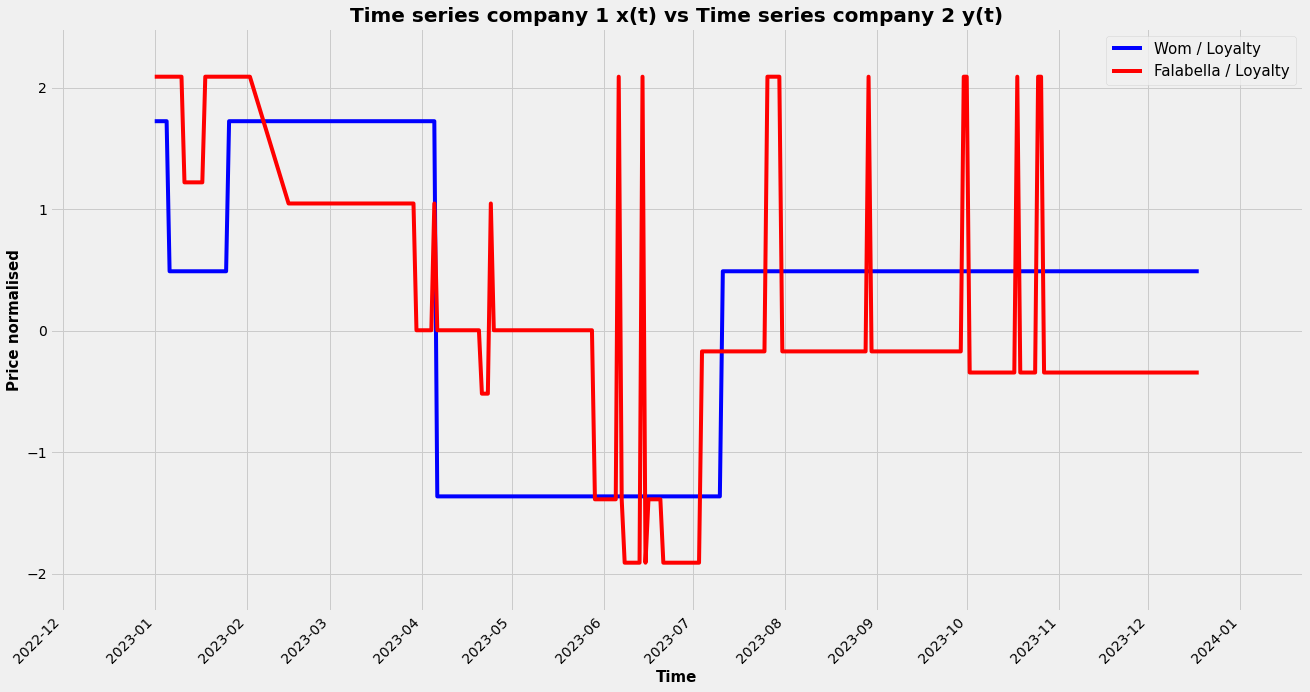

/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


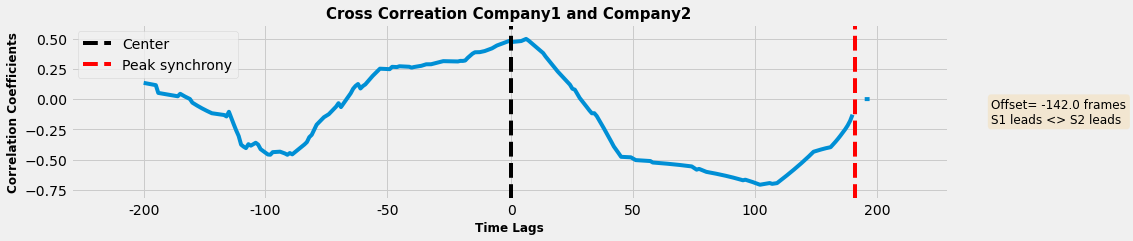

In [25]:
company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'

product='Apple iPhone 14 Plus 128GB '
data_serie=create_dataserie(df_company1, df_company2, company1, company2, product) 
s1 = data_serie[company1].dropna()
s2 = data_serie[company2].dropna()
s1_centred=s1-s1.mean()
s2_centred=s2-s2.mean()

df_cc=crosscorrelation_different_lags(s1_centred,s2_centred, product, -10,10)
plot_time_series(s1_centred,s2_centred,"Exemplos/Exemplo-processed data 2 companys for 1 product/plot_timeserie_Wom_Falabella"+"_"+product+".png")
offset=plot_crosscorr(s1_centred,s2_centred,"Exemplos/Exemplo-processed data 2 companys for 1 product/plot_crossc_Wom_Falabella_"+product+".png",0)

In [26]:
df_cc

,Apple iPhone 14 Plus 128GB
-10,0.397312
-9,0.404879
-8,0.412332
-7,0.419678
-6,0.431465
-5,0.443074
-4,0.450789
-3,0.458401
-2,0.465916
-1,0.473336


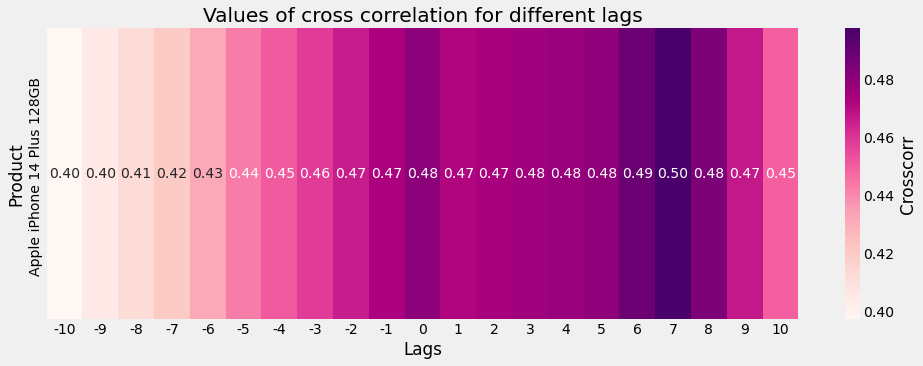

In [27]:

plt.figure(figsize=(15, 5))
heatmap_pos = sns.heatmap(df_cc.T, cmap='RdPu', annot=True, fmt=".2f", cbar_kws={'label': 'Crosscorr'})
plt.title('Values of cross correlation for different lags')
plt.xlabel('Lags')
plt.ylabel('Product')
plt.show()
plt.savefig("Exemplos/Exemplo-processed data 2 companys for 1 product/heatmap_all_values_crosscorr_Wom_Falabella"+product+".png", bbox_inches='tight')
plt.close()


In [28]:

cc_pos_lag = None
cc_neg_lag = None
cc_zero_lag = None


for lag, correlation in df_cc.iterrows():
    if lag > 0:
        if cc_pos_lag is None or correlation.values[0] > cc_pos_lag[0]:
            cc_pos_lag = (correlation.values[0], lag)  
    elif lag < 0:
        if cc_neg_lag is None or correlation.values[0] > cc_neg_lag[0]:
            cc_neg_lag = (correlation.values[0], lag)  
    else:
        cc_zero_lag = (correlation.values[0], lag)   



print("Higher correlation for positive lag:", round(cc_pos_lag[0], 3), "no lag:", cc_pos_lag[1])
print("Higher correlation for negative lag:", round(cc_neg_lag[0], 3), "no lag:", cc_neg_lag[1])
print("Correlation for zero lag:", round(cc_zero_lag[0], 3), "no lag:", cc_zero_lag[1])


cc_values = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []}
cc_values['lag_neg'] = round(cc_neg_lag[0], 2) if cc_neg_lag is not None else None
cc_values['lag_zero'] = round(cc_zero_lag[0], 2) if cc_zero_lag is not None else None
cc_values['lag_pos'] = round(cc_pos_lag[0], 2) if cc_pos_lag is not None else None


df_cc_values = pd.DataFrame(cc_values, index=[product])  
df_cc_values


Higher correlation for positive lag: 0.498 no lag: 7
Higher correlation for negative lag: 0.473 no lag: -1
Correlation for zero lag: 0.481 no lag: 0


,lag_neg,lag_zero,lag_pos
Apple iPhone 14 Plus 128GB,0.47,0.48,0.5


# Dynamic time warping

In [29]:
def plot_warping_with_dates(s1, s2, filename):
    path = dtw.warping_path(s1,s2)
    
    dtwvis.plot_warping(s1,s2, path)

    
    return path

def warping_paths(s1_numeric,s2_numeric,filename):

    random.seed(1)
    for idx in range(len(s2_numeric)):
        if random.random() < 0.05:
            s2_numeric[idx] += (random.random() - 0.5) / 2

    d, paths = dtw.warping_paths(s1_numeric, s2_numeric, window=25, psi=2)
    best_path = dtw.best_path(paths)

    dtwvis.plot_warpingpaths(s1_numeric, s2_numeric, paths, best_path)
    plt.show() 

    plt.close()
    return d, best_path
    


In [30]:
def calculate_warping_percent( path, product):
    percentages = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []} # Dicionário para armazenar as porcentagens
    count_neg = count_zero = count_pos = 0
    
    for i, j in path:
        difference = i - j
        if difference < 0:
            count_neg += 1
        elif difference == 0:
            count_zero += 1
        else:
            count_pos += 1

    total = len(path)
    percentages['lag_neg'] = (count_neg / total )*100
    percentages['lag_zero'] = (count_zero / total)*100
    percentages['lag_pos'] = (count_pos / total)*100

    df_percentages = pd.DataFrame(percentages, index=[product])

    return df_percentages

In [31]:

def calculate_warping_percent_best_path(best_path, product):
    
    percentages = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []} 
    count_neg = count_zero = count_pos = 0
    differences = [point[1] - point[0] for point in best_path]
    

    for diff in differences:
        if diff > 0:
            count_pos += 1
        elif diff < 0:
            count_neg += 1
        else:
            count_zero += 1


    total = len(best_path)
    percentages['lag_neg'] = (count_neg / total )*100
    percentages['lag_zero'] = (count_zero / total)*100
    percentages['lag_pos'] = (count_pos / total)*100
    
    percentages['count_lag_neg'] = count_neg 
    percentages['count_lag_zero'] = count_zero 
    percentages['count_lag_pos'] = count_pos 
    percentages['count_total'] = total
    
   
    df_percentages = pd.DataFrame(percentages, index=[product])

    return df_percentages, differences

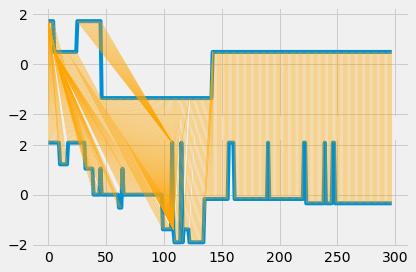

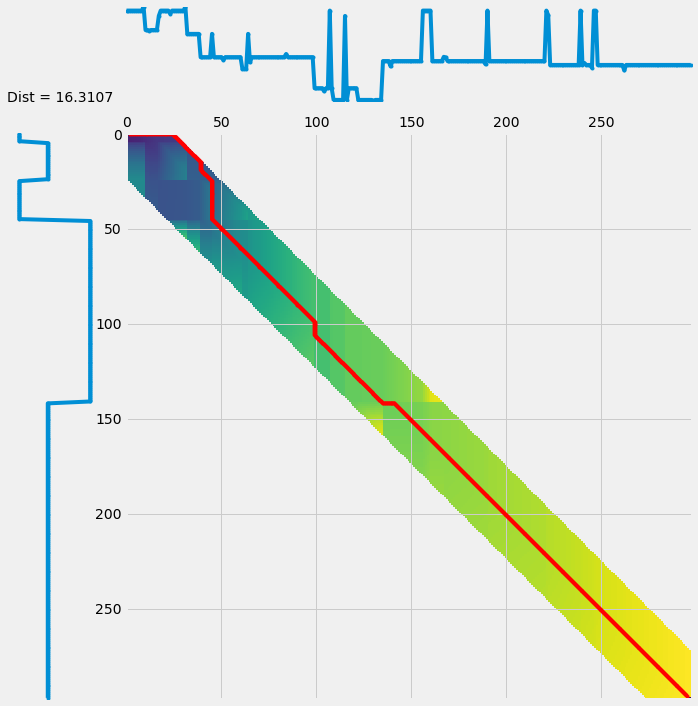

In [32]:
company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'

product='Apple iPhone 14 Plus 128GB '
data_serie=create_dataserie(df_company1, df_company2, company1, company2, product)
    
s1=data_serie[company1].astype(float).tolist()
s2=data_serie[company2].astype(float).tolist()

path = plot_warping_with_dates(s1, s2, filename="Exemplos/Exemplo-processed data 2 companys for 1 product/warp_Wom_Falabella"+product+".png")

    
s1_numeric = data_serie[company1].astype(float).to_numpy()
s2_numeric = data_serie[company2].astype(float).to_numpy()
d, best_path=warping_paths(s1_numeric,s2_numeric, "Exemplos/Exemplo-processed data 2 companys for 1 product/warping_paths_example_Wom_Falabella"+product+".png")



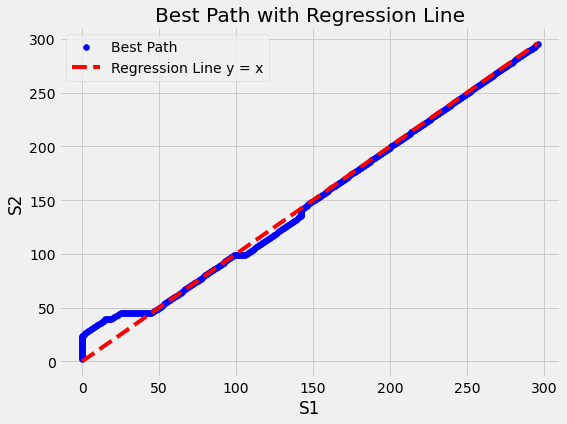

In [34]:

x_values = [point[0] for point in best_path]
y_values = [point[1] for point in best_path]


plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Best Path')
plt.plot(x_values, y_values, color='blue', linestyle='-')


plt.plot(x_values, x_values, color='red', linestyle='--', label='Regression Line y = x')

plt.title('Best Path with Regression Line')
plt.xlabel('S1')
plt.ylabel('S2')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
df_percentages_path=calculate_warping_percent( path, product)
df_percentages_best_path=calculate_warping_percent_best_path(best_path, product)


In [36]:
df_percentages_path

,lag_neg,lag_zero,lag_pos
Apple iPhone 14 Plus 128GB,48.837209,40.826873,10.335917


In [37]:
df_percentages_best_path,dif = calculate_warping_percent_best_path(best_path, product)

In [38]:
df_percentages_best_path

,lag_neg,lag_zero,lag_pos,count_lag_neg,count_lag_zero,count_lag_pos,count_total
Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,203,55,67,325


In [39]:
total = len(best_path)

dif_percentages = {'Difference': [], 'Percentage': []}

unique_diffs = set(dif)
for diff in unique_diffs:
    
    percent_diff = dif.count(diff) / total * 100
    dif_percentages['Difference'].append(diff)
    dif_percentages['Percentage'].append(percent_diff)

df_dif_percentages = pd.DataFrame(dif_percentages)
    
df_dif_percentages=df_dif_percentages.set_index("Difference")
df_dif_percentages

,Percentage
Difference,
0,16.923077
1,0.307692
2,0.615385
3,0.615385
4,0.615385
5,0.615385
6,0.615385
7,0.615385
8,0.615385


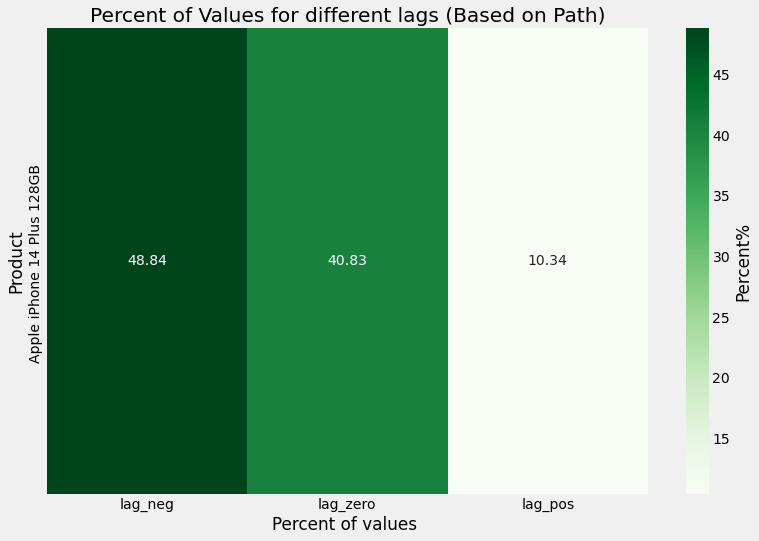

In [40]:

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_percentages_path, cmap='Greens', annot=True, fmt=".2f", cbar_kws={'label': 'Percent%'})
plt.title('Percent of Values for different lags (Based on Path)')
plt.xlabel('Percent of values ')
plt.ylabel('Product')
plt.savefig("Exemplos/Exemplo-processed data 2 companys for 1 product/heatmap_dtw_Wom_Falabella"+product+".png", bbox_inches='tight')

plt.show()




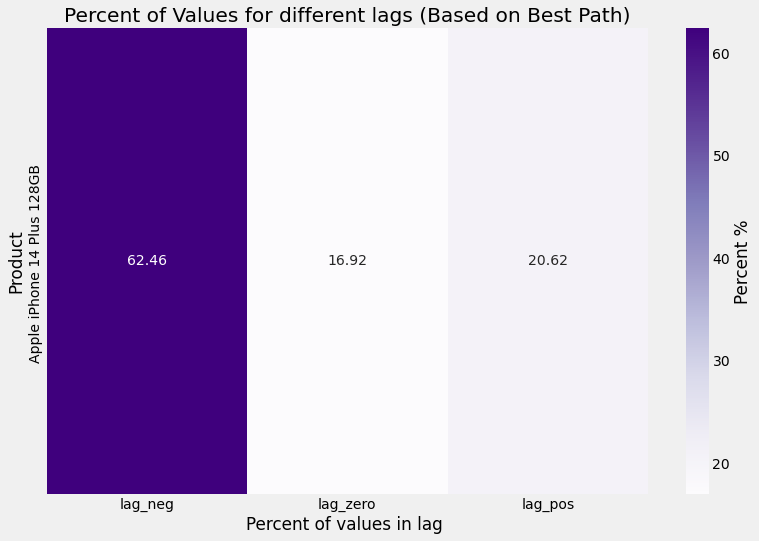

In [41]:

plt.figure(figsize=(12, 8))


df_selected_dtw_best_path = df_percentages_best_path[['lag_neg', 'lag_zero', 'lag_pos']]

heatmap_pos = sns.heatmap(df_selected_dtw_best_path, cmap='Purples', annot=True, fmt=".2f", cbar_kws={'label': 'Percent %'})
plt.title('Percent of Values for different lags (Based on Best Path)')
plt.xlabel('Percent of values in lag ')
plt.ylabel('Product')

plt.savefig("Exemplos/Exemplo-processed data 2 companys for 1 product/heatmap_dtw_Wom_Falabella"+product+".png", bbox_inches='tight')

plt.show()


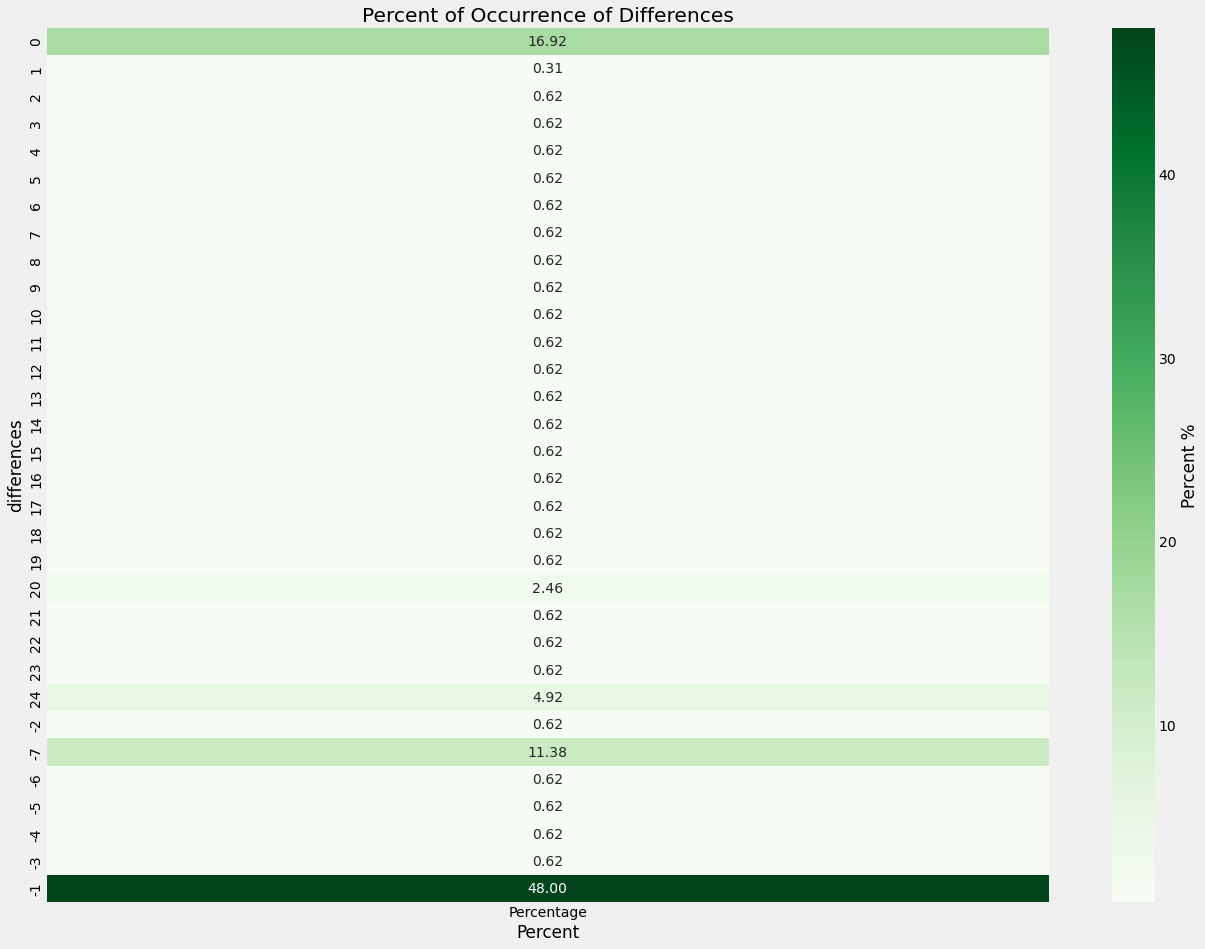

In [42]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_dif_percentages, cmap="Greens", annot=True, fmt=".2f", cbar_kws={'label': 'Percent %'})
plt.title('Percent of Occurrence of Differences')
plt.xlabel('Percent')

plt.ylabel('differences')
plt.savefig("img_tese_cp3_dtw/dtw3-4.png", bbox_inches='tight')

plt.show()


<Figure size 1440x1080 with 0 Axes>

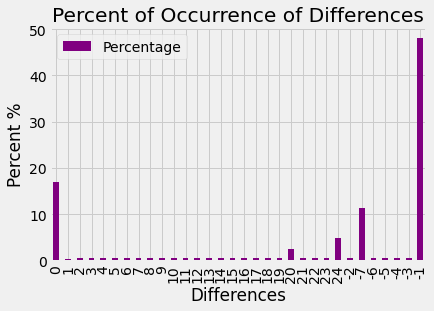

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))  # Aumenta o tamanho do gráfico
df_dif_percentages.plot(kind='bar', color='purple')  # Altera a cor para roxo
plt.title('Percent of Occurrence of Differences')
plt.xlabel('Differences')
plt.ylabel('Percent %')
plt.savefig("img_tese_cp3_dtw/dtw3-4.png", bbox_inches='tight')
plt.show()


# Intantaneous phase synchrony

In [44]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


In [45]:
def inst_phase_synchrony(s1,s2,filename):
    lowcut  = .01
    highcut = .5
    fs = 30.
    order = 1
    d1 = s1
    d2 = s2

    min_length = min(len(d1), len(d2))
    d1 = d1[:min_length]
    d2 = d2[:min_length]

    y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
    y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

    al1 = np.angle(hilbert(y1),deg=False)
    al2 = np.angle(hilbert(y2),deg=False)
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    N = len(al1)
    
    # Plot results
    f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
    ax[0].plot(y1,color='r',label='Company Wow')
    ax[0].plot(y2,color='b',label='Company Falabella')
    ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
    ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
    ax[1].plot(al1,color='r')
    ax[1].plot(al2,color='b')
    ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    ax[2].plot(phase_synchrony)
    ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()
    return al1,al2

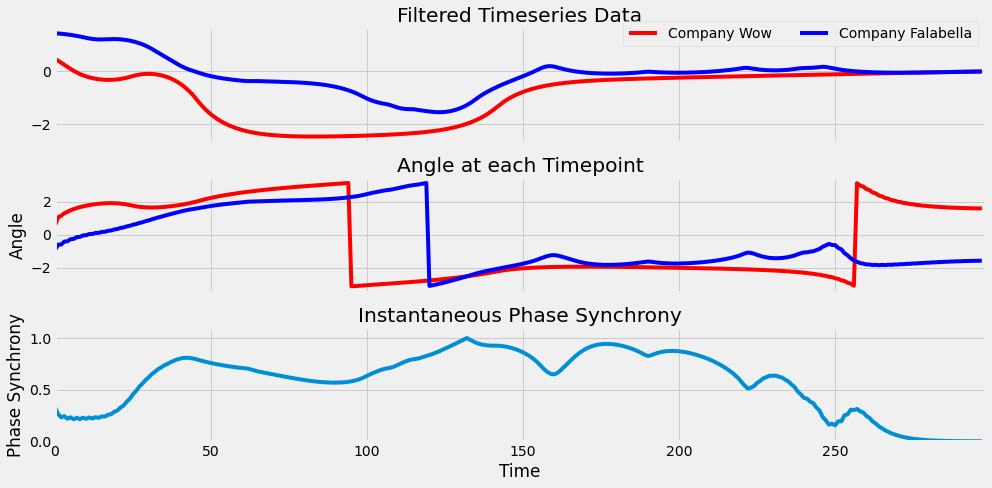

In [47]:
company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'

product='Apple iPhone 14 Plus 128GB '
data_serie=create_dataserie(df_company1, df_company2, company1, company2, product)
s1 = data_serie[company1].astype(float)
s2 = data_serie[company2].astype(float)
s1_centred=s1-s1.mean()
s2_centred=s2-s2.mean()
al1,al2=inst_phase_synchrony(s1,s2,"Exemplos/Exemplo-processed data 2 companys for 1 product/plot_IPS__Wom_Falabella"+product+".png")
    

In [61]:
def calcular_percentage_lag(phase_differences):
    total_points = len(phase_differences)
    lag_positive = 0
    lag_negative = 0
    lag_zero = 0
    
    for difference in phase_differences:
        if difference > 0:
            lag_positive += 1
        elif difference < 0:
            lag_negative += 1
        else:
            lag_zero += 1

    percentage_lag_positive = (lag_positive / total_points) * 100
    percentage_lag_negative = (lag_negative / total_points) * 100
    percentage_lag_zero = (lag_zero / total_points) * 100
    total=percentage_lag_positive+percentage_lag_negative+ percentage_lag_zero
    
    return percentage_lag_positive, percentage_lag_zero, percentage_lag_negative, total


In [62]:
phase_differences = al1 - al2

In [64]:
percentage_lag_positive, percentage_lag_zero, percentage_lag_negative, total = calcular_percentage_lag(phase_differences)

print("Percentage of positive lag:", percentage_lag_positive)
print("Percentage of negative lag:", percentage_lag_negative)
print("Percentage of zero lag:", percentage_lag_zero)


Percentage of positive lag: 49.664429530201346
Percentage of negative lag: 50.33557046979866
Percentage of zero lag: 0.0


In [65]:
data = {
    "Lag pos": [percentage_lag_positive],
    "Lag zero": [percentage_lag_zero],
    "Lag neg": [percentage_lag_negative]
    
}


df = pd.DataFrame(data, index=[product])

df

,Lag pos,Lag zero,Lag neg
Apple iPhone 14 Plus 128GB,49.66443,0.0,50.33557


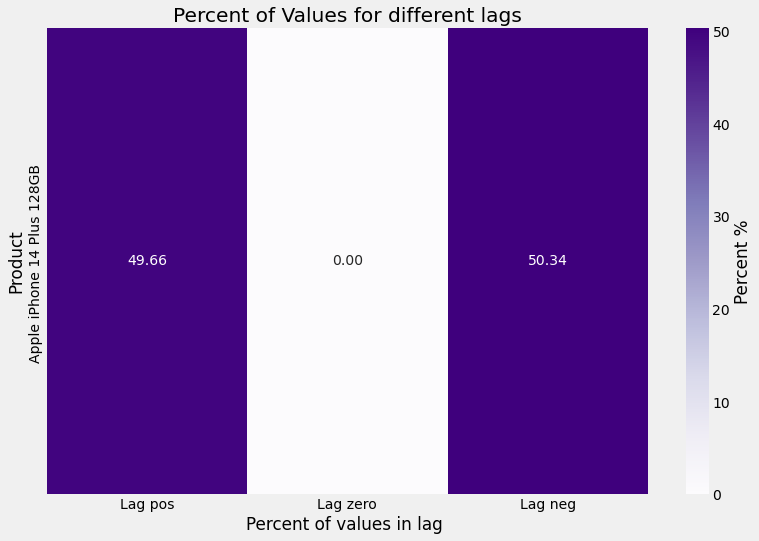

In [66]:

plt.figure(figsize=(12, 8))

heatmap_pos = sns.heatmap(df, cmap='Purples', annot=True, fmt=".2f", cbar_kws={'label': 'Percent %'})
plt.title('Percent of Values for different lags')
plt.xlabel('Percent of values in lag ')
plt.ylabel('Product')

plt.savefig("Exemplos/Exemplo-processed data 2 companys for 1 product/heatmap_ips_Wom_Falabella"+product+".png", bbox_inches='tight')

plt.show()